In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

/home/cleber/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df = pd.read_csv('Cu2', skipinitialspace=True)
df.dropna(axis=1, inplace=True)
# theta = df['Angle']
# data = df['Int']
# plt.scatter(df['Angle'], df['Int'])
df.head()

,Angle,Int
0,32.00,182
1,32.05,179
2,32.10,198
3,32.15,194
4,32.20,203


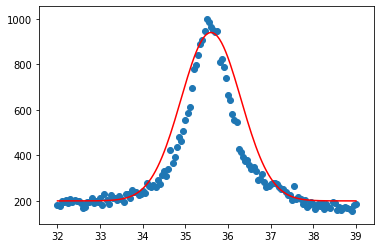

In [8]:
def gauss(x,A,mu,sigma,K):
    return (A / (sigma * math.sqrt(2 * math.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2)))+K


fig, ax = plt.subplots()
ax.plot(df['Angle'], gauss(df['Angle'], 1300, 35.6, 0.7,200), color='r')
plt.scatter(df['Angle'], df['Int'])

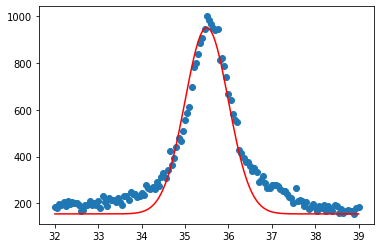

In [9]:
# guess = [10, 38, 1, 10]
guess = [max(df['Int']), np.mean(df['Angle']), 0.5, min(df['Int'])]


n = len(df['Angle'])
y = np.empty(n)

for i in range(n):
    y[i] = gauss(df['Angle'][i], guess[0], guess[1], guess[2], guess[3])

plt.scatter(df['Angle'], df['Int'])
plt.plot(df['Angle'], y, 'r')

Amplitude: 911.581,
 Média mu: 35.566,
 Sigma: 0.497,
 y_offset: 210.499


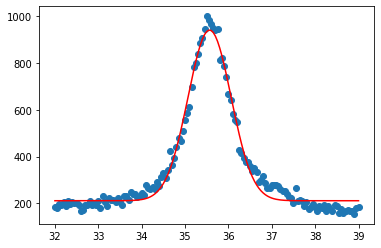

In [10]:
a = df['Angle'].values
s = df['Int'].values
c, cov = curve_fit(gauss, a, s, guess)
# print(c)

for i in range(n):
    y[i] = gauss(df['Angle'][i], c[0], c[1], c[2], c[3])

plt.scatter(df['Angle'], df['Int'])
plt.plot(df['Angle'], y, 'r')


print(f'Amplitude: {c[0]:3.3f},\n Média mu: {c[1]:3.3f},\n Sigma: {c[2]:3.3f},\n y_offset: {c[3]:3.3f}')

In [19]:
from sklearn.metrics import r2_score

In [20]:
print('R^2: ', r2_score(y, s))

R^2:  0.978206357892647
